# PROYECTO MÓDULO 3: TRANSFORMANDO EL TALENTO

### EQUIPO 1

### GESTIÓN DE NULOS

In [1]:
# Importamos las librerías necesarias:

import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargamos el csv con los datos ya modificados y limpios:

df = pd.read_csv("HR RAW DATA transformado 02-06.csv", index_col=False)
df

,age,attrition,businesstravel,distancefromhome,education,educationfield,employeenumber,gender,jobinvolvement,joblevel,...,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,remotework,department,environmentsatisfaction
0,51,no,NaN,6,3,NaN,162.0,m,3,5,...,full_time,0,5,3.0,20,15,15,yes,research & development,1
1,52,no,NaN,1,4,life sciences,259.0,m,2,5,...,full_time,1,5,3.0,33,11,9,yes,unknow,3
2,42,no,travel_rarely,4,2,technical degree,319.0,m,3,5,...,full_time,0,3,NaN,22,11,15,yes,research & development,3
3,47,no,travel_rarely,2,4,medical,NaN,f,3,4,...,full_time,2,2,NaN,20,5,6,no,research & development,1
4,46,no,NaN,3,3,technical degree,NaN,f,4,4,...,full_time,1,5,3.0,19,2,8,no,sales,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,3,1,life sciences,967.0,m,2,3,...,full_time,1,6,3.0,16,3,7,no,sales,3
1610,45,no,non_travel,4,2,NaN,972.0,m,3,2,...,full_time,0,5,2.0,9,0,8,yes,research & development,3
1611,39,no,travel_rarely,13,5,NaN,NaN,m,4,3,...,full_time,0,3,3.0,8,0,7,yes,sales,1
1612,36,no,non_travel,8,4,technical degree,990.0,m,3,2,...,full_time,2,3,3.0,7,0,7,yes,sales,1


### Análisis de datos PREVIO a la imputación de nulos

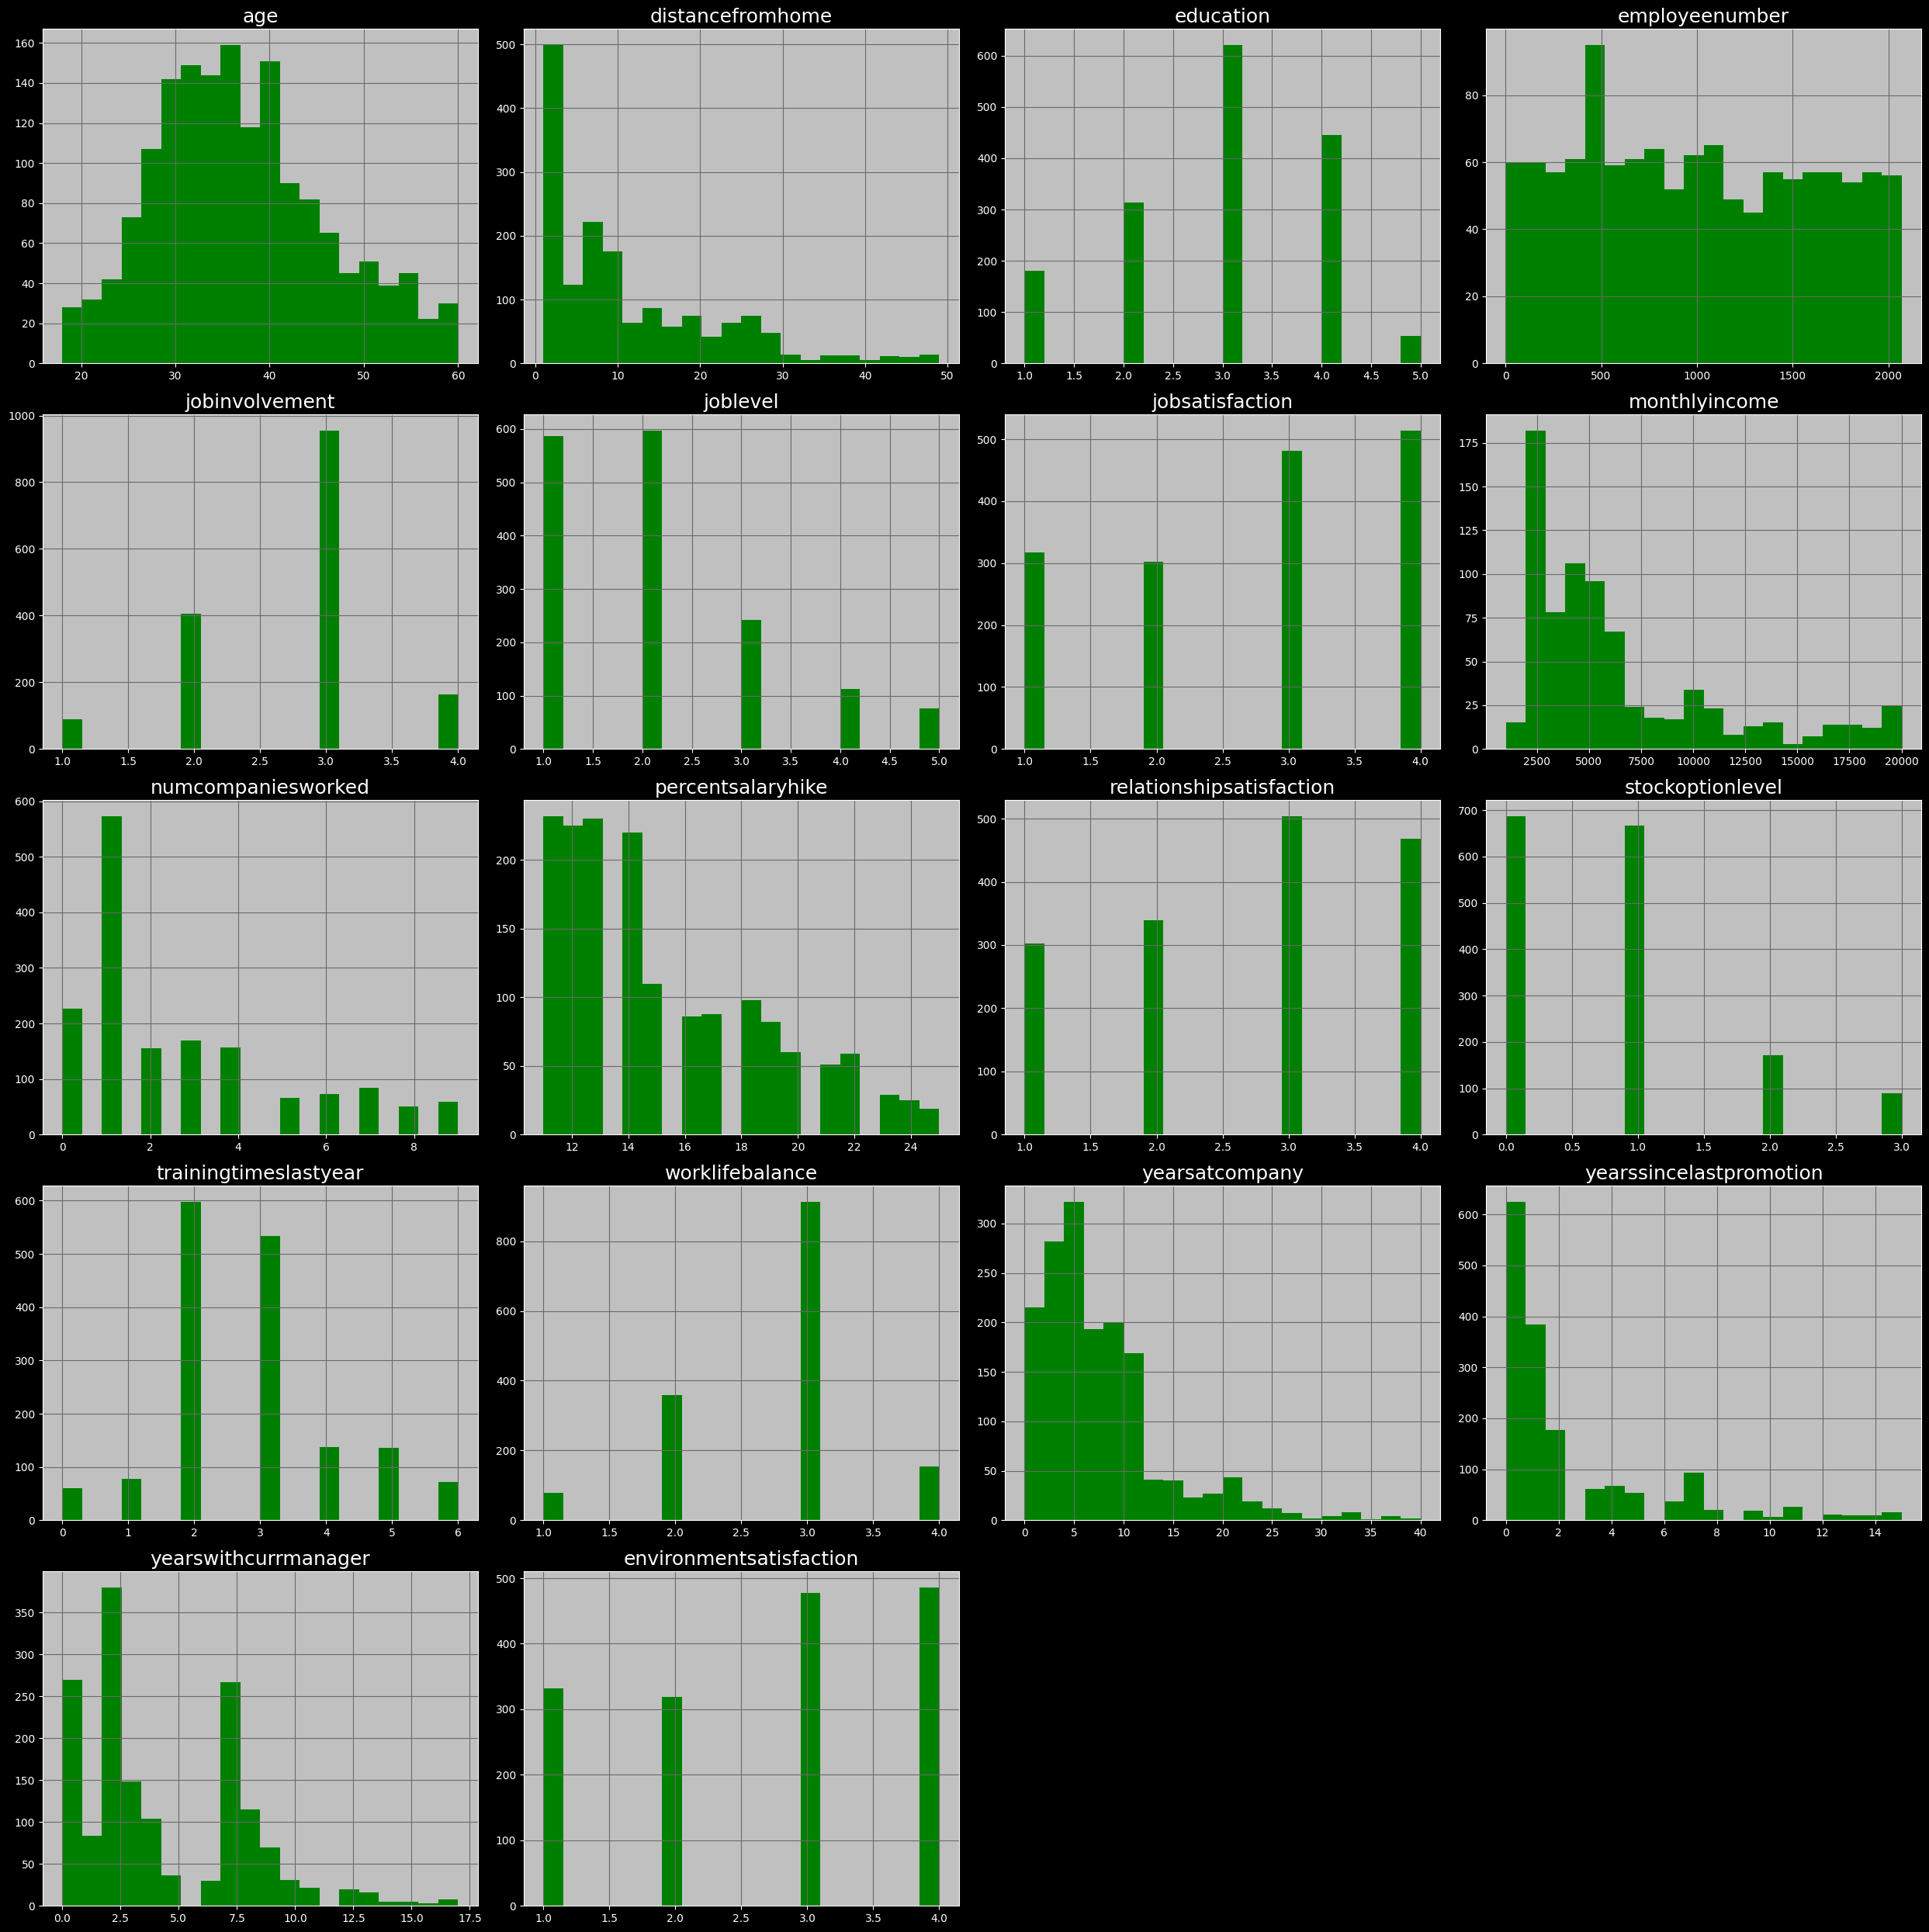

In [3]:
# Representamos la distribución de todos los datos de categorías numéricas, para poder decidir cómo
# imputamos los nulos:

# Creamos histogramas automáticamente:
axes = df.hist(bins=20, figsize=(25, 25), color='green')

# Creamos una variable de la figura para modificar el color:
fig = plt.gcf()  # gcf = get current figure

# Cambiamos el fondo de la figura:
fig.patch.set_facecolor('black')

# Aseguramos que axes es un array plano para recorrerlo fácilmente:
axes = axes.flatten()

# Personalizamos cada subplot:
for ax in axes:
    ax.set_facecolor('silver')  # Fondo del gráfico
    ax.title.set_color('white')  # Título en blanco
    ax.title.set_fontsize(18)
    ax.tick_params(colors='white')  # Ejes en blanco
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(color='dimgray')  # Cuadrícula gris oscuro

    for spine in ax.spines.values():  # Bordes
        spine.set_color('white')

plt.tight_layout() # Para ajustar automáticamente el espaciado entre los subplots
plt.show()

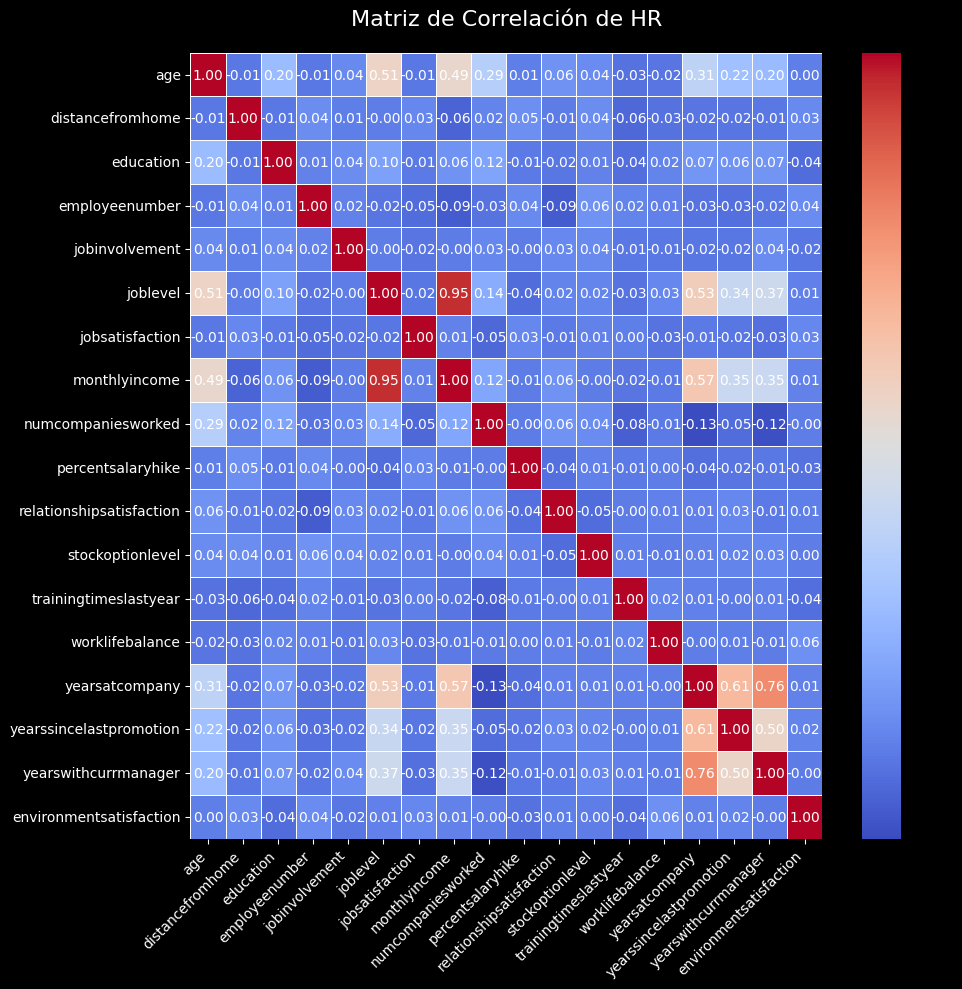

In [4]:
# Tambiém visualizamos una matriz de correlación con los datos numéricos para hacernos una idea de 
# lo que tenemos antes de imputar los nulos:

# Creamos la matriz de correlación numérica:
df_corr2 = df.select_dtypes(include=['number']).corr()

# Creamos la figura y cambiamos el fondo:
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('black')     # Fondo de la figura
ax.set_facecolor('black')            # Fondo del gráfico 

# Creamos el mapa de correlación:
sns.heatmap(
    df_corr2,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    ax=ax,
    cbar_kws={'label': 'Correlación'},
    annot_kws={"color": "white"}     # Color del texto dentro de los cuadros
)

# Personalizamos el título:
ax.set_title("Matriz de Correlación de HR", color='white', fontsize=16, pad=20)

# Cambiamos el color de etiquetas de los ejes:
ax.tick_params(colors='white')  # Ticks
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Cambiamos el color de etiquetas: 
ax.set_xticklabels(ax.get_xticklabels(), color='white', rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), color='white', rotation=0)

plt.tight_layout()
plt.show()

### Observamos que hay algunas columnas con una correlación positiva

- Tienen una correlación media (0,5 - 0,6): "joblevel", "monthlyincome" y "yearssincelastpromotion" con "yearsatcompany". También "monthlyincome" y "joblevel" con "age". Y "yearssincelastpromotion" con "yearswithcurrmanager".
- Tienen una correlación positiva bastante elevada (0,76 - 0,95): "monthlyincome" con "joblevel" y "yearsatcompany" con "yearswithcurrmanager".


In [5]:
# Como hemos visto que la columna 'monthlyincome' tiene un 52 % de nulos, vamos a hacer algunas visualizaciones
# antes de imputar los nulos. Primero observamos la media de sueldo de los empleados que se han ido 
# y los que se quedan:

df_jb= df.groupby('attrition')['monthlyincome'].mean().sort_values(ascending=False).round(2)
df_jb

attrition
no     6811.50
yes    4768.86
Name: monthlyincome, dtype: float64

Text(0.5, 1.0, 'Relación entre sueldo mensual y puesto trabajo')

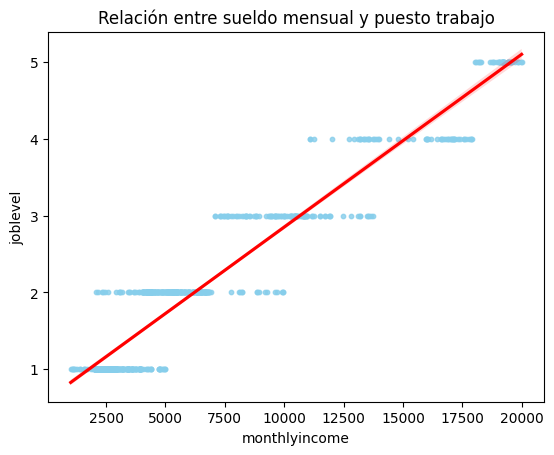

In [6]:
# Visualizamos la relación entre el "joblevel" y el sueldo mensual de los empleados. Cuanto mayor es el 
# puesto de trabajo, mayor es el sueldo mensual.

sns.regplot(x='monthlyincome', y='joblevel', data=df, scatter_kws={'s':10, 'color':'skyblue'}, line_kws={'color':'red'})
plt.title('Relación entre sueldo mensual y puesto trabajo')

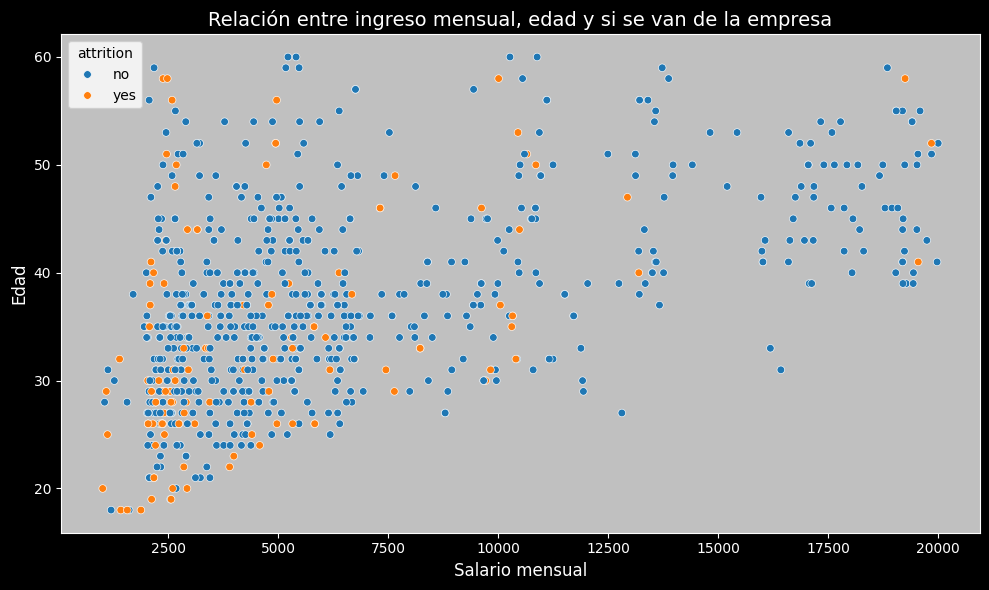

In [7]:
# También valoramos el sueldo mensual de los empleados, dependiendo de la edad y de si se van de la empresa o no.
# Podemos observar que, en general, tienden a tener mayor sueldo las personas con mayor edad, pero que también
# hay empleados de edad avanzada con sueldos bajos. Y, a la vez, observamos que los empleados que tienden 
# a irse de la empresa son los que cobran menos y son más jovenes. 

# Creamos la figura:
fig, ax = plt.subplots(figsize=(10, 6))

# Cambiamos los colores de los fondos:
fig.patch.set_facecolor('black')  # Fondo general figura
ax.set_facecolor('silver')        # Fondo del gráfico 
    
# Cambiamos el color de los ticks (números) y etiquetas:
ax.tick_params(axis='both', colors='white')  # Ticks de eje x e y
ax.xaxis.label.set_color('white')            # Etiqueta eje x
ax.yaxis.label.set_color('white')            # Etiqueta eje y

# Cambiamos el color de las líneas del eje (spines):
for spine in ax.spines.values():
    spine.set_color('white')

# Creamos el gráfico:
sns.scatterplot(x='monthlyincome', y='age', hue='attrition', data=df, s=30, ax=ax)
ax.set_xlabel("Salario mensual", fontsize=12)
ax.set_ylabel("Edad", fontsize=12)
ax.set_title("Relación entre ingreso mensual, edad y si se van de la empresa", 
             color='white', fontsize=14)

plt.tight_layout()
plt.show()


C:\Users\AIDA\AppData\Local\Temp\ipykernel_10920\1043323593.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="attrition", y="monthlyincome", data=df, palette = 'Greens')


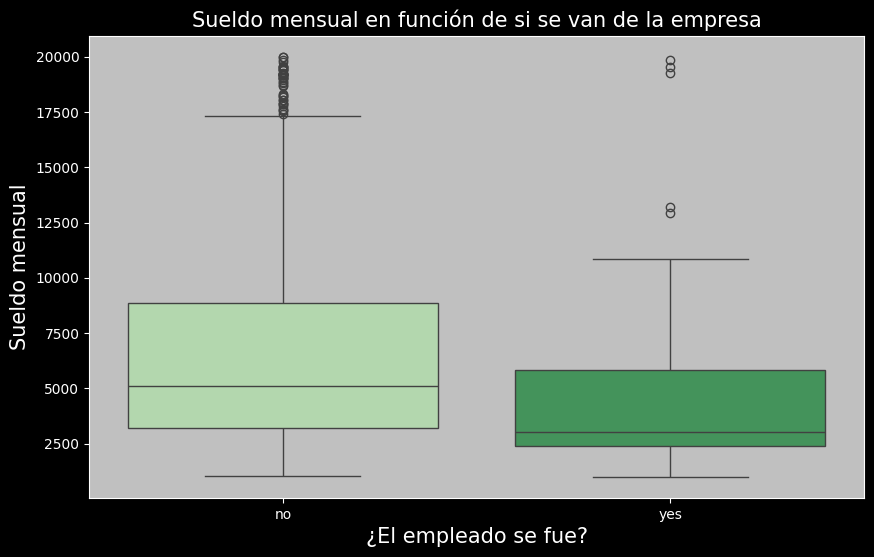

In [8]:
# En la distribución de los sueldos, vemos claramente que los empleados que se van son los que cobran
# menos. Y que la mediana de sueldo de los que se van es bastante más baja que las de los que se quedan:

# Creamos la figura:
fig, ax = plt.subplots(figsize=(10, 6))

# Cambiamos los colores de los fondos:
fig.patch.set_facecolor('black')  # Fondo general figura
ax.set_facecolor('silver')          # Fondo del gráfico (subplot)
    
# Cambiamos el color de ticks (números) y etiquetas: 
ax.tick_params(axis='both', colors='white')  # Ticks de eje x e y
ax.xaxis.label.set_color('white')            # Etiqueta eje x
ax.yaxis.label.set_color('white')            # Etiqueta eje y

# Cambiamos el color de las líneas del eje (spines):
for spine in ax.spines.values():
    spine.set_color('white')

# Creamos el gráfico:
sns.boxplot(x="attrition", y="monthlyincome", data=df, palette = 'Greens')
plt.title("Sueldo mensual en función de si se van de la empresa", color='white', fontsize='15')
plt.xlabel("¿El empleado se fue?", fontsize='15')
plt.ylabel("Sueldo mensual", fontsize='15')
plt.show()

### Imputación de nulos:

In [9]:
# Vemos cuántos nulos tenemos en cada columna:

nulos = df.isnull().sum()
nulos

age                           0
attrition                     0
businesstravel              772
distancefromhome              0
education                     0
educationfield              745
employeenumber              431
gender                        0
jobinvolvement                0
joblevel                      0
jobrole                       0
jobsatisfaction               0
maritalstatus               651
monthlyincome               843
numcompaniesworked            0
overtime                    676
percentsalaryhike             0
relationshipsatisfaction      0
standardhours                 0
stockoptionlevel              0
trainingtimeslastyear         0
worklifebalance             108
yearsatcompany                0
yearssincelastpromotion       0
yearswithcurrmanager          0
remotework                    0
department                    0
environmentsatisfaction       0
dtype: int64

In [10]:
# Es más visual representar los nulos en porcentaje y ordenando las columnas por las que tienen mayor
# porcentaje y las que tienen menos:

porcentaje_nulos = round((df.isnull().sum()/df.shape[0])*100,2)
porcentaje_nulos.sort_values(ascending=False)

monthlyincome               52.23
businesstravel              47.83
educationfield              46.16
overtime                    41.88
maritalstatus               40.33
employeenumber              26.70
worklifebalance              6.69
gender                       0.00
distancefromhome             0.00
attrition                    0.00
education                    0.00
age                          0.00
jobsatisfaction              0.00
jobrole                      0.00
joblevel                     0.00
jobinvolvement               0.00
percentsalaryhike            0.00
relationshipsatisfaction     0.00
standardhours                0.00
numcompaniesworked           0.00
stockoptionlevel             0.00
trainingtimeslastyear        0.00
yearsatcompany               0.00
yearssincelastpromotion      0.00
yearswithcurrmanager         0.00
remotework                   0.00
department                   0.00
environmentsatisfaction      0.00
dtype: float64

In [11]:
# Recordamos los tipos de datos que tenemos en cada columna:

df.dtypes

age                           int64
attrition                    object
businesstravel               object
distancefromhome              int64
education                     int64
educationfield               object
employeenumber              float64
gender                       object
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome               float64
numcompaniesworked            int64
overtime                     object
percentsalaryhike             int64
relationshipsatisfaction      int64
standardhours                object
stockoptionlevel              int64
trainingtimeslastyear         int64
worklifebalance             float64
yearsatcompany                int64
yearssincelastpromotion       int64
yearswithcurrmanager          int64
remotework                   object
department                   object
environmentsatisfaction     

In [12]:
# Vemos solo las columnas de tipo "object" que tienen nulos:

columnas_object_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
columnas_object_nulos

Index(['businesstravel', 'educationfield', 'maritalstatus', 'overtime'], dtype='object')

In [13]:
# Ahora para cada columna de tipo "object", mostramos qué porcentaje de datos tiene cada categoría única,
# incluyendo los nulos como otra categoría:

for col in columnas_object_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(round(df[col].value_counts(dropna=False, normalize=True) * 100,2))  # Convertimos a porcentaje
    print("........................")

La distribución de las categorías (incluyendo nulos) para la columna businesstravel


businesstravel
NaN                  47.83
travel_rarely        36.31
travel_frequently    10.22
non_travel            5.64
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna educationfield


educationfield
NaN                 46.16
life sciences       21.62
medical             17.10
marketing            6.44
technical degree     4.28
other                3.66
human resources      0.74
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna maritalstatus


maritalstatus
NaN         40.33
married     27.20
single      20.14
divorced    12.33
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna overtime


overtime
no     42.26
NaN    41.88
yes    15.86
Name: proportion, dtype: float64

........................


In [ ]:
# Al observar que "educationfield" tiene un porcentaje alto de nulos (46%) y que la variable tampoco nos
# interesa mucho, decidimos elimanarla:

df.drop('educationfield', axis = 1, inplace = True)

In [15]:
# Las otras 3 columnas, también tienen un valor alto de nulos, pero son datos que nos interesan bastante
# para el análisis final, así que, decidimos crear una categoría nueva en cada columna, llamada 'Unknown' para todos 
# los nulos y así poder sacar conclusiones:

columnas_desconocido = ["businesstravel", "maritalstatus", "overtime"]

for col in columnas_desconocido:
    df[col] = df[col].fillna('Unknown')

In [16]:
# Repasamos si nos hemos dejado alguna columna de tipo "object" con nulos:

columnas_object_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
columnas_object_nulos

Index([], dtype='object')

In [17]:
# Ahora vamos con los nulos de las columnas numéricas:

columnas_number_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "number").columns
columnas_number_nulos

Index(['employeenumber', 'monthlyincome', 'worklifebalance'], dtype='object')

In [18]:
# Hacemos lo mismo que con las categóricas, representar el porcentaje de valores únicos dentro de cada columna
# incluyendo los nulos también. Pero vemos que este dato no nos proporciona mucha información:

for col in columnas_number_nulos:
    print(f"La distribución de las numéricas (incluyendo nulos) para la columna", col)
    display(round(df[col].value_counts(dropna=False, normalize=True) * 100,2))  # Convertimos a porcentaje
    print("........................")

La distribución de las numéricas (incluyendo nulos) para la columna employeenumber


employeenumber
NaN       26.70
783.0      0.12
789.0      0.12
793.0      0.12
803.0      0.12
          ...  
1847.0     0.06
1853.0     0.06
1860.0     0.06
1865.0     0.06
999.0      0.06
Name: proportion, Length: 1080, dtype: float64

........................
La distribución de las numéricas (incluyendo nulos) para la columna monthlyincome


monthlyincome
NaN        52.23
6347.0      0.25
5304.0      0.25
2657.0      0.19
2258.0      0.19
           ...  
1393.0      0.06
16959.0     0.06
10306.0     0.06
19232.0     0.06
6735.0      0.06
Name: proportion, Length: 669, dtype: float64

........................
La distribución de las numéricas (incluyendo nulos) para la columna worklifebalance


worklifebalance
3.0    56.57
2.0    22.24
4.0     9.60
NaN     6.69
1.0     4.89
Name: proportion, dtype: float64

........................


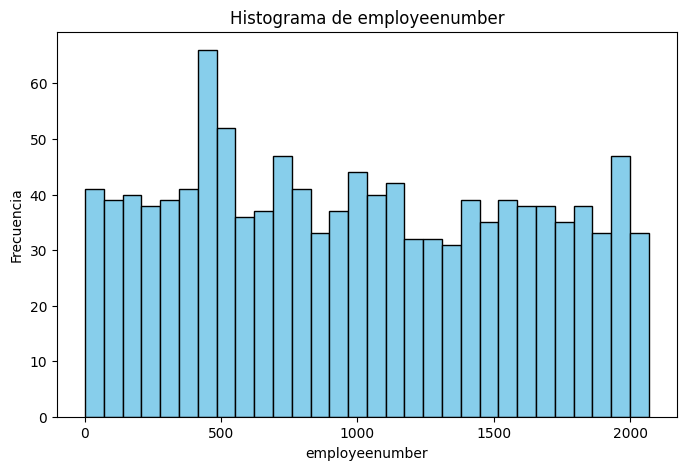

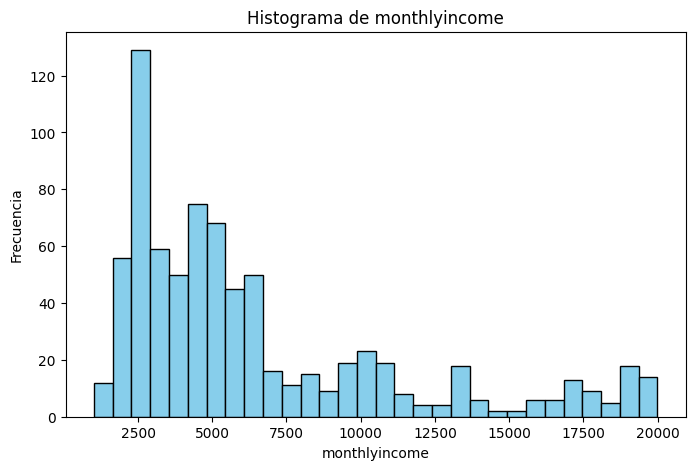

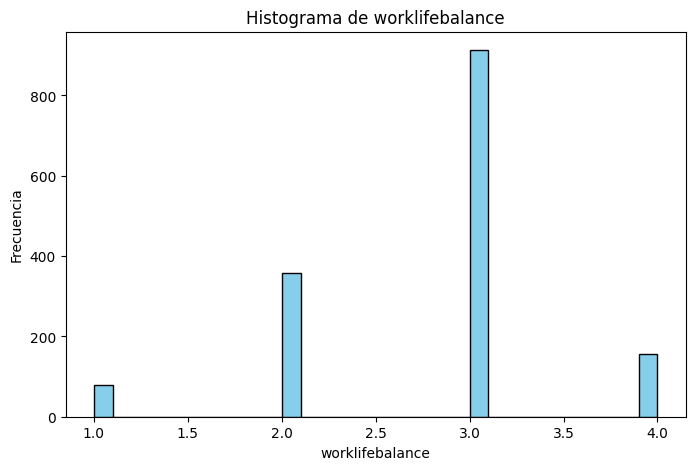

In [19]:
# Así que, decidimos visualizar de nuevo en histogramas únicamente las columnas de tipo numéricas que tengan 
# nulos, para ver qué distribución tienen los datos:

import matplotlib.pyplot as plt

# Crear un histograma separado para cada columna numérica con nulos:
for col in list(columnas_number_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [20]:
# Al observar que la columna "employeenumber" tiene muchos nulos y que realmente no nos interesa tanto, decidimos eliminarla:

df.drop('employeenumber', axis = 1, inplace = True)

In [21]:
# Observamos que la proporción de nulos de la columna "worklifebalance" es baja y sigue una distribución asimétrica, por lo tanto, decidimos imputar los nulos con la mediana:

df["worklifebalance"].median()

np.float64(3.0)

In [22]:
df["worklifebalance"] = df["worklifebalance"].fillna(df["worklifebalance"].median())

In [23]:
# Observamos los nulos que nos quedan en cada columna. Nuestra base de datos ya solo tiene datos nulos en la columna "monthlyincome".

df.isnull().sum()

age                           0
attrition                     0
businesstravel                0
distancefromhome              0
education                     0
gender                        0
jobinvolvement                0
joblevel                      0
jobrole                       0
jobsatisfaction               0
maritalstatus                 0
monthlyincome               843
numcompaniesworked            0
overtime                      0
percentsalaryhike             0
relationshipsatisfaction      0
standardhours                 0
stockoptionlevel              0
trainingtimeslastyear         0
worklifebalance               0
yearsatcompany                0
yearssincelastpromotion       0
yearswithcurrmanager          0
remotework                    0
department                    0
environmentsatisfaction       0
dtype: int64

In [24]:
# Pasamos el tipo de dato de la columna "worklifebalance" de float a int:

df['worklifebalance'] = df['worklifebalance'].astype(int)

In [25]:
# Volvemos a comprobar los tipos de datos:

df.dtypes

age                           int64
attrition                    object
businesstravel               object
distancefromhome              int64
education                     int64
gender                       object
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome               float64
numcompaniesworked            int64
overtime                     object
percentsalaryhike             int64
relationshipsatisfaction      int64
standardhours                object
stockoptionlevel              int64
trainingtimeslastyear         int64
worklifebalance               int64
yearsatcompany                int64
yearssincelastpromotion       int64
yearswithcurrmanager          int64
remotework                   object
department                   object
environmentsatisfaction       int64
dtype: object

In [26]:
# Decidimos que, aunque la columna de "monthlyincome" tenga un 52% de valores nulos, nos interesa mucho y decidimos hacer una imputación con el KNNImputer, 
# ya que no tiene una correlación directa con otra columna, sino que se basaría en varios datos de un mismo registro para sacar el valor faltante:

imputer_knn = KNNImputer(n_neighbors=20)
df['monthlyincome'] = imputer_knn.fit_transform(df[['monthlyincome']])
df

,age,attrition,businesstravel,distancefromhome,education,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,...,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,remotework,department,environmentsatisfaction
0,51,no,Unknown,6,3,m,3,5,research director,3,...,full_time,0,5,3,20,15,15,yes,research & development,1
1,52,no,Unknown,1,4,m,2,5,manager,3,...,full_time,1,5,3,33,11,9,yes,unknow,3
2,42,no,travel_rarely,4,2,m,3,5,manager,4,...,full_time,0,3,3,22,11,15,yes,research & development,3
3,47,no,travel_rarely,2,4,f,3,4,research director,3,...,full_time,2,2,3,20,5,6,no,research & development,1
4,46,no,Unknown,3,3,f,4,4,sales executive,1,...,full_time,1,5,3,19,2,8,no,sales,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,3,1,m,2,3,sales executive,4,...,full_time,1,6,3,16,3,7,no,sales,3
1610,45,no,non_travel,4,2,m,3,2,laboratory technician,2,...,full_time,0,5,2,9,0,8,yes,research & development,3
1611,39,no,travel_rarely,13,5,m,4,3,sales executive,3,...,full_time,0,3,3,8,0,7,yes,sales,1
1612,36,no,non_travel,8,4,m,3,2,sales executive,4,...,full_time,2,3,3,7,0,7,yes,sales,1


### Realmente nos damos cuenta de que nos rellena todos los nulos de "monthlyincome" con la media de los datos que tenemos y nos cambia mucho la distribución de los datos. Así que, para sacar las conclusiones de esta columna, lo haremos antes de imputar los nulos.

### Volvemos a representar los histogramas y las correlaciones una vez imputados los nulos para ver las diferencias:

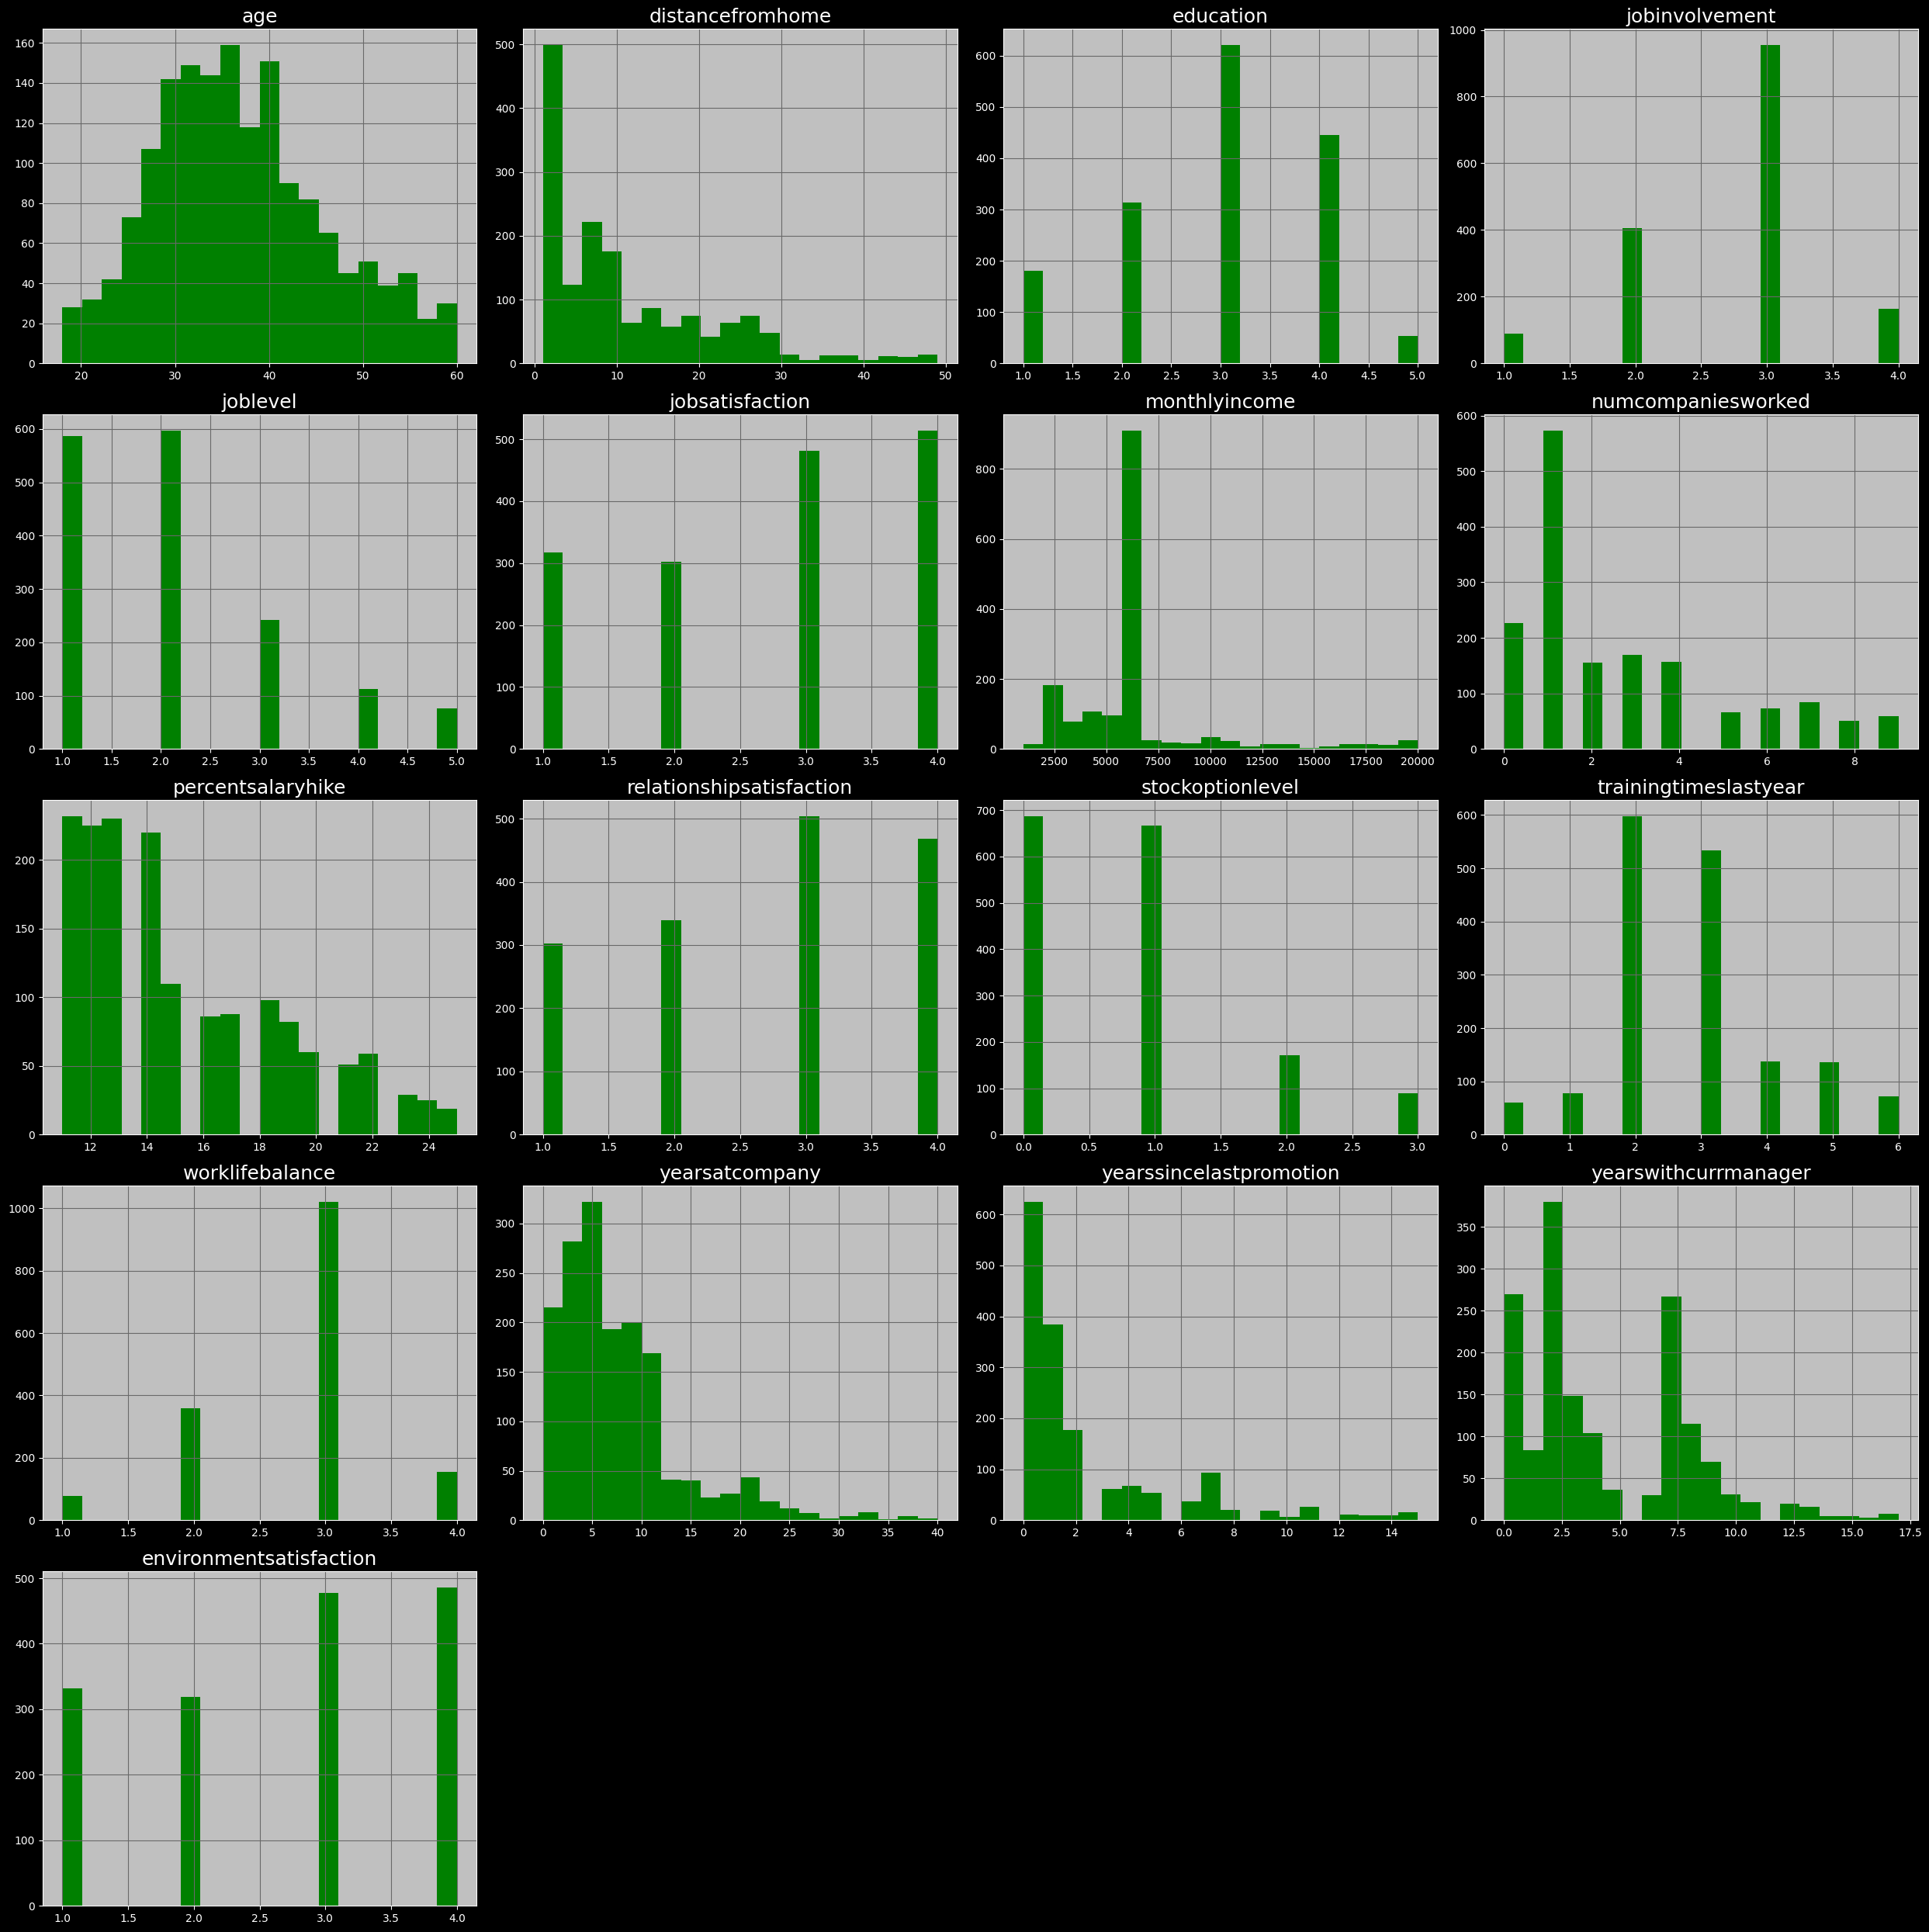

In [27]:
# Creamos histogramas automáticamente:
axes = df.hist(bins=20, figsize=(25, 25), color='green')

# Creamos una variable de la figura para modificar el color:
fig = plt.gcf()  # gcf = get current figure

# Cambiamos el fondo de la figura:
fig.patch.set_facecolor('black')

# Aseguramos que "axes" es un array plano para recorrerlo fácilmente:
axes = axes.flatten()

# Personalizamos cada subplot:
for ax in axes:
    ax.set_facecolor('silver')  # Fondo del gráfico
    ax.title.set_color('white')  # Título en blanco
    ax.title.set_fontsize(18)
    ax.tick_params(colors='white')  # Ejes en blanco
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(color='dimgray')  # Cuadrícula gris oscuro

    for spine in ax.spines.values():  # Bordes
        spine.set_color('white')

plt.tight_layout()  # Para ajustar automáticamente el espaciado entre los subplots
plt.show()

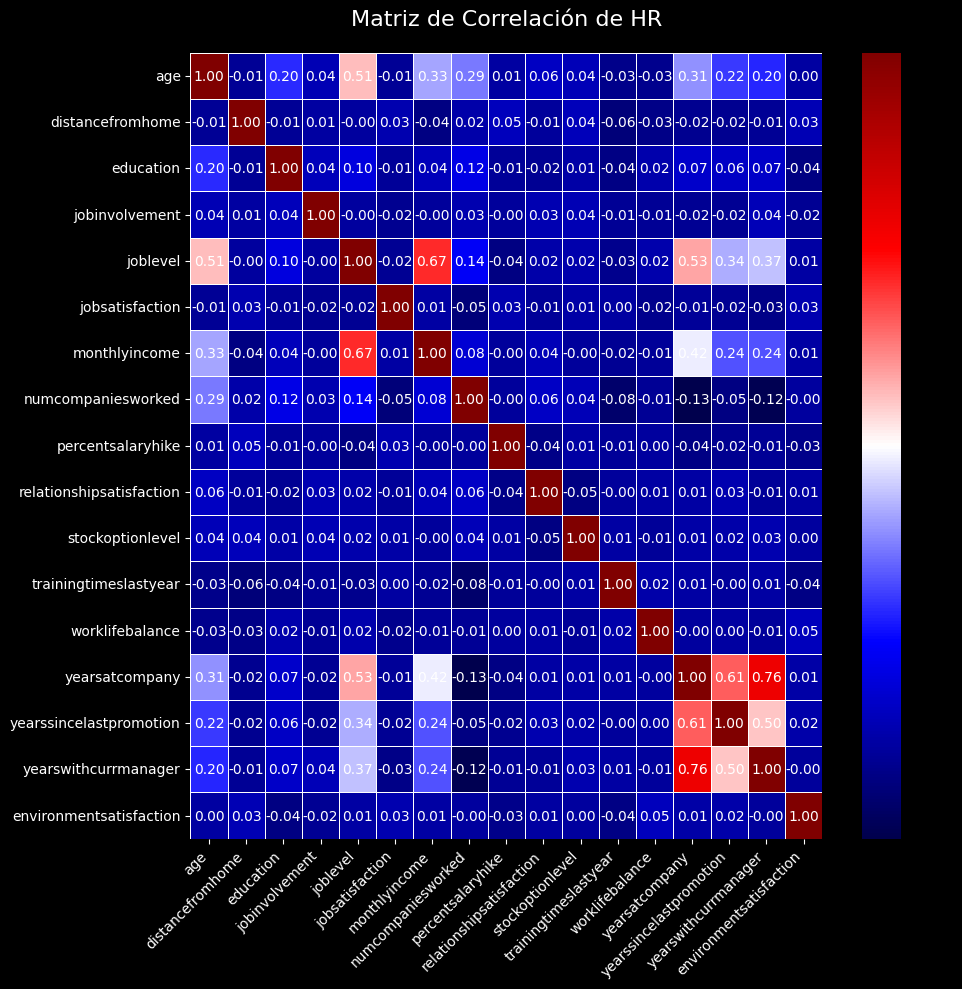

In [28]:
# Creamos la matriz de correlación numérica:
df_corr2 = df.select_dtypes(include=['number']).corr()

# Creamos la figura y cambiamos el fondo:
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('black')     # Fondo de la figura
ax.set_facecolor('black')            # Fondo del gráfico 

# Creamos el mapa de correlación:
sns.heatmap(
    df_corr2,
    cmap='seismic',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    ax=ax,
    cbar_kws={'label': 'Correlación'},
    annot_kws={"color": "white"}     # Color del texto dentro de los cuadros
)

# Personalizamos el título:
ax.set_title("Matriz de Correlación de HR", color='white', fontsize=16, pad=20)

# Cambiamos el color de etiquetas de los ejes:
ax.tick_params(colors='white')  # Ticks
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Cambiamos el color de las etiquetas:
ax.set_xticklabels(ax.get_xticklabels(), color='white', rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), color='white', rotation=0)

plt.tight_layout()
plt.show()

- Observamos que las correlaciones se mantienen, excepto en aquellas columnas que tenían correlación con el "monthlyincome", que ahora ya no la tienen, una vez imputados los nulos. A excepción de "joblevel" con "monthlyincome" que antes tenían una correlación muy alta, y ahora siguen teniendo, pero es mucho menor. Esto mantiene nuestra decisión de sacar los resultados con el "monthlyincome" antes de imputar los nulos, ya que es la variable que más cambia.


In [29]:
# Guardamos el csv con los datos modificados, limpios y con los nulos gestionados:

df = df.to_csv("HR RAW DATA nulos imputados 04-06.csv", index=False)